In [191]:
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import scipy as sp
import scipy.optimize as opt
import scipy.integrate as integ
import migration_reader as mg

%matplotlib inline


ImportError: No module named cumtrapz

In [5]:
sim=mg.Sim(sim.run(alpha=.01))

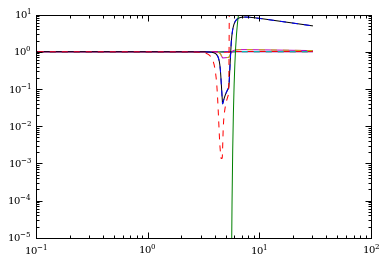

In [118]:
for s in sims1:
    plt.plot(s.rc,s.lam[:,-1]/s.lam0,s.rc,s.lam_ss[:,-1]/s.lam0,'--')
    plt.xscale('log')
plt.ylim(1e-5,10)
plt.yscale('log')

In [10]:
print sim.vs[-1],sim.vs_ss[-1]

-0.000165447531244 -0.000168450468838


In [57]:
md0 = sim.bc_mdot
mdvals = np.array([.1,.3,1,3,10])*md0
sims = np.array([mg.Sim(sim.run(bc_mdot=m,nvisc=5,dt=1e3)) for m in mdvals])

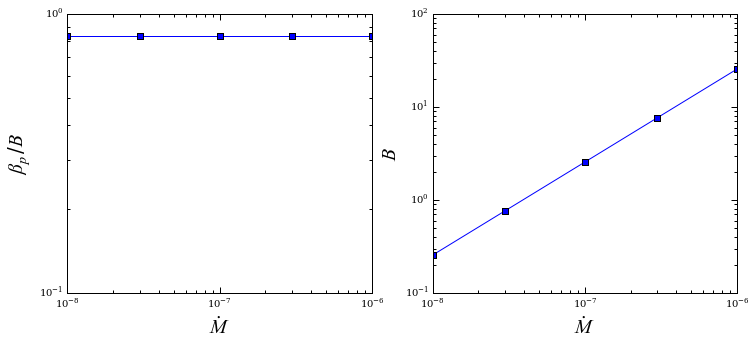

In [108]:
fig,axes = plt.subplots(1,2,figsize=(12,5))

drifts = np.array([s.vs[-1]/s.vr_nu(s.a) for s in sims])
bvals = np.array([s.B[-1] for s in sims])
avals = np.array([ (s.lam_ss[-1,-1]/s.lam0[-1]-1)*(np.sqrt(s.ro)-np.sqrt(s.ri)) for s in sims])
axes[0].plot(mdvals,drifts/bvals,'-s')
axes[1].plot(mdvals,bvals,'-s')
axes[0].set_ylabel('$\\beta_p/B$',fontsize=20)
axes[1].set_ylabel('$B$',fontsize=20)
for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.minorticks_on()
    ax.set_xlabel('$\\dot{M}$',fontsize=20)
    

In [144]:
muvals = np.array([.3,1,1.3,2,3])

sims1=[mg.Sim(sim.run(mp=m,nr=4096,nvisc=10,dt=1e2)) for m in muvals]
kvals = np.array([s.K for s in sims1])

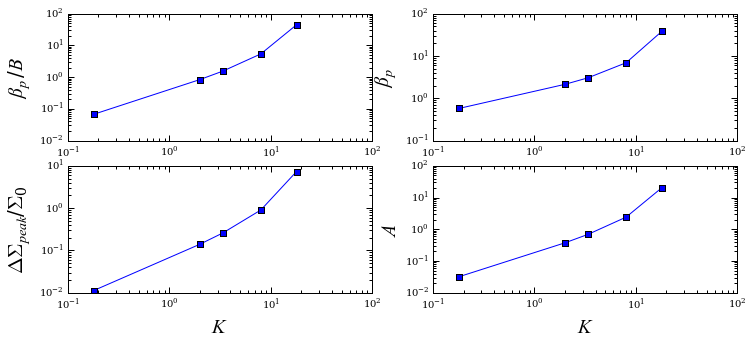

In [172]:
fig,axes = plt.subplots(2,2,figsize=(12,5))

kvals = np.array([s.K for s in sims1])
peak = np.array([(s.lam[:,-1]/s.lam0)[s.rc>=s.a].max() for s in sims1])
gaps = np.array([(s.lam[:,-1]/s.lam0)[s.rc>=s.a][0] for s in sims1])

a2vals=np.array([.5*np.trapz(s.torque[:,-1]*s.lam[:,-1],x=np.log(s.rc))/s.bc_mdot for s in sims1])
drifts = np.array([s.vs[-1]/s.vr_nu(s.a) for s in sims1])
bvals = np.array([s.B[-1] for s in sims1])
avals = np.array([ (s.lam_ss[-1,-1]/s.lam0[-1]-1)*(np.sqrt(s.ro)-np.sqrt(s.ri)) for s in sims1])
axes[0,0].plot(kvals,drifts/bvals,'-s')
axes[0,1].plot(kvals,drifts,'-s')
axes[1,0].plot(kvals,peak-1,'-s')
axes[1,1].plot(kvals,avals,'-s')
axes[1,1].set_ylim(1e-2,1e2)
axes[1,0].set_xlabel('$K$',fontsize=20)
axes[1,1].set_xlabel('$K$',fontsize=20)
axes[0,0].set_ylabel('$\\beta_p/B$',fontsize=20)
axes[0,1].set_ylabel('$\\beta_p$',fontsize=20)
axes[1,0].set_ylabel('$\\Delta \\Sigma_{peak}/\\Sigma_0$',fontsize=20)
axes[1,1].set_ylabel('$A$',fontsize=20)
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.minorticks_on()

fig.savefig('several_K_same_Mdot.pdf')
    

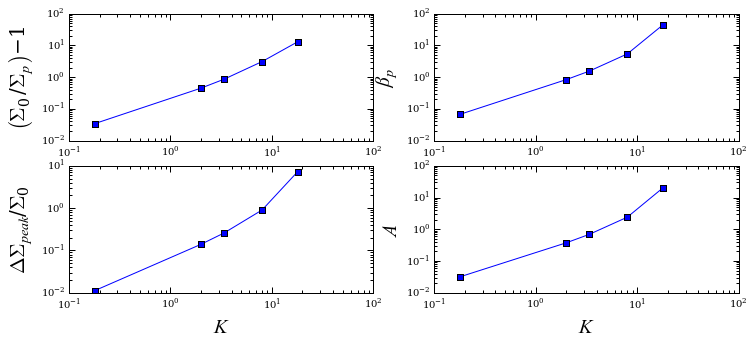

In [189]:
fig,axes = plt.subplots(2,2,figsize=(12,5))

kvals = np.array([s.K for s in sims1])
peak = np.array([(s.lam[:,-1]/s.lam0)[s.rc>=s.a].max() for s in sims1])
gaps = np.array([(s.lam[:,-1]/s.lam0)[s.rc>=s.a][0] for s in sims1])

a2vals=np.array([.5*np.trapz(s.torque[:,-1]*s.lam[:,-1],x=np.log(s.rc))/s.bc_mdot for s in sims1])
drifts = np.array([s.vs[-1]/s.vr_nu(s.a) for s in sims1])
bvals = np.array([s.B[-1] for s in sims1])
avals = np.array([ (s.lam_ss[-1,-1]/s.lam0[-1]-1)*(np.sqrt(s.ro)-np.sqrt(s.ri)) for s in sims1])
axes[0,0].plot(kvals,1/gaps-1,'-s')
axes[0,1].plot(kvals,drifts/bvals,'-s')
axes[1,0].plot(kvals,peak-1,'-s')
axes[1,1].plot(kvals,avals,'-s')
axes[1,1].set_ylim(1e-2,1e2)
axes[1,0].set_xlabel('$K$',fontsize=20)
axes[1,1].set_xlabel('$K$',fontsize=20)
axes[0,0].set_ylabel('$\\left(\\Sigma_0/\\Sigma_p\\right)-1$',fontsize=20)
axes[0,1].set_ylabel('$\\beta_p$',fontsize=20)
axes[1,0].set_ylabel('$\\Delta \\Sigma_{peak}/\\Sigma_0$',fontsize=20)
axes[1,1].set_ylabel('$A$',fontsize=20)
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.minorticks_on()

fig.savefig('several_K_same_Mdot.pdf')
    

In [112]:
sims1[-1] = mg.Sim(sims1[-1].run(mp=10,nr=4096,nvisc=30))

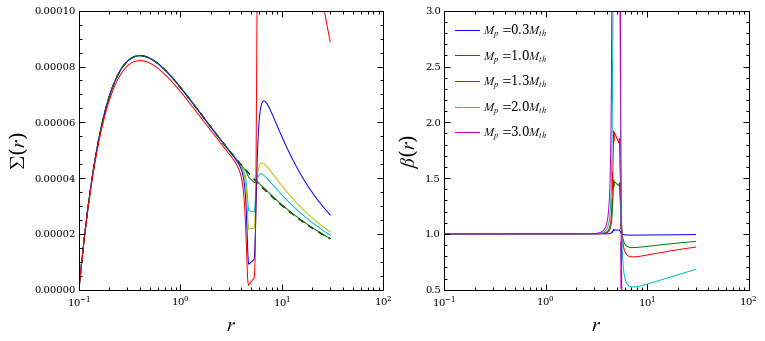

In [184]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
for s in sims1:
    axes[0].plot(s.rc,s.lam0/(2*np.pi*s.rc),'--')
    axes[0].plot(s.rc,s.lam[:,-1]/(2*np.pi*s.rc))
    axes[1].plot(s.rc,s.vr[:,-1]/s.vr_nu(s.rc))
#    axes[0].plot(s.rc,s.lam_ss[:,-1]/(2*np.pi*s.rc),'--')
    axes[0].set_xscale('log')
 #   axes[0].set_yscale('log')
  #  axes[0].set_ylim(1e-6,1e-3)
    
axes[1].set_xscale('log')
axes[1].set_xlabel('$r$',fontsize=20)
axes[0].set_xlabel('$r$',fontsize=20)
axes[0].set_ylabel('$\\Sigma(r)$',fontsize=20)
axes[1].set_ylabel('$\\beta(r)$',fontsize=20)
axes[0].minorticks_on()
axes[1].minorticks_on()
axes[1].legend(['$M_p=%.1f M_{th}$'%s.mp for s in sims1],loc='upper left')
axes[0].set_ylim(0,1e-4)
axes[1].set_ylim(0.5,3)
fig.savefig('example_profs.pdf')


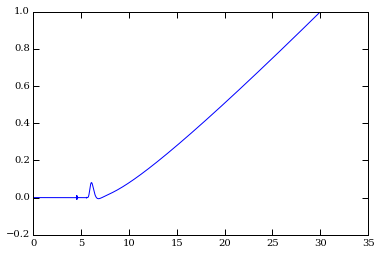

In [117]:
plt.plot(s.rc,s.mdot[:,-1]/s.bc_mdot)

In [154]:
print avals,a2vals

[  0.03185952   0.37498288   0.69438141   2.41664309  20.42156379] [  0.03007438   0.37334422   0.69288802   2.41609666  20.02820715]


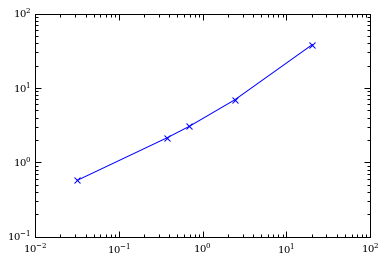

In [165]:
plt.loglog(avals,drifts,'-x')
#plt.loglog(kvals,-avals*np.array([-2*np.sqrt(s.a)*s.bc_mdot/(s.mp*s.mth) for s in sims1]),'o')

In [227]:
xr=sim.rc[sim.rc>=sim.a]
xl =sim.rc[sim.rc<=sim.a][::-1]
phir=integ.cumtrapz(.5*sim.torque[sim.rc>=sim.a,-1]*sim.lam0[sim.rc>=sim.a],x=np.log(sim.rc[sim.rc>=sim.a]))
phil=integ.cumtrapz(.5*sim.torque[sim.rc<=sim.a,-1][::-1]*sim.lam0[sim.rc<=sim.a][::-1],x=np.log(xl))



(1e-05, 1)

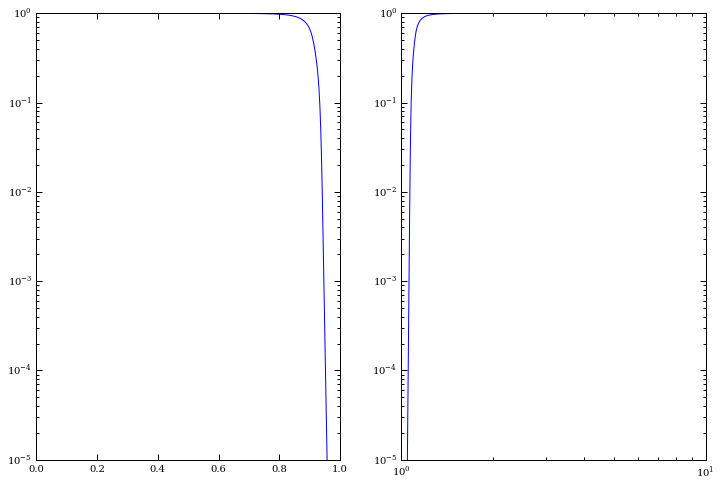

In [229]:
fig,axes=plt.subplots(1,2,figsize=(12,8))
axes[1].plot(xr[1:]/sim.a,phir/phir[-1])
axes[0].plot(xl[1:]/sim.a,phil/phil[-1])
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim(1e-5,1)
axes[1].set_ylim(1e-5,1)

In [299]:
def func(x,sim,xd):
    norm = sim.a
    left_region = xd*sim.h-sim.h/2
    right_region = xd*sim.h+sim.h/2
    left_region *= norm
    right_region *=norm
    try:
        x[0]
        list_flag=True
    except TypeError:
        list_flag = False
    
    if list_flag:
        return np.array([1/(norm*sim.h) if left_region <= np.abs(xi-sim.a) <= right_region else 0 for xi in x])
    else:
        if left_region <= np.abs(x-sim.a) <= right_region:
            return 1/sim.h
        else:
            return 0

def tau_int(x):
    return np.abs(x**(1.5)-1)**(1.5)
def tau(x,h):
    norm=3*(1./h)**(2.5)/(2.**(1.25))
    return norm*integ.quad(tau_int,1,x)[0]

def phi_duff(x,sim):
    return 1-func_duff(x,sim)

def dTr_duff(x,sim):
    f0 = .45
    tsh = 1.89 + .53/sim.mp
    norm=3*(1./sim.h)**(2.5)/(2.**(1.25))


    try:
        x[0]
        list_flag = True
    except:
        list_flag = False
    
    if not list_flag:
        tauval = tau(x/sim.a,sim.h)
        
        if tauval < tsh:
            return 0
        else:
            return .5*func_duff(x,sim)*norm*tau_int(x/sim.a)/tauval
    
    else:
        res = np.zeros(x.shape)
        for i,xi in enumerate(x):
            tauval=tau(xi/sim.a,sim.h)
            if tauval < tsh:
                res[i] = 0
            else:
                res[i] = .5*func_duff(xi,sim)*tau_int(xi/sim.a)/tauval
        return res

def func_duff(x,sim):
    f0 = .45
    tsh = 1.89 + .53/sim.mp
    try:
        x[0]
        list_flag = True
    except:
        list_flag = False
    
    
    if not list_flag:
        tauval = tau(x/sim.a,sim.h)
        if tauval < tsh:
            return f0
        else:
            return f0*np.sqrt(tsh/tauval)
    
    else:
        res = np.zeros(x.shape)
        for i,xi in enumerate(x):
            tauval=tau(xi/sim.a,sim.h)
            if tauval < tsh:
                res[i] = f0
            else:
                res[i] = f0*np.sqrt(tsh/tauval)
        return res
    

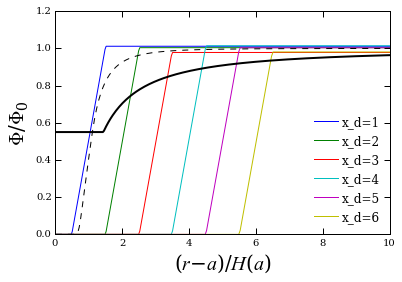

In [303]:
# plt.plot(sim.rc/sim.a-1,func(sim.rc,sim,3))
# plt.plot(sim.rc/sim.a-1,func(sim.rc,sim,6))

xdvals = np.array([1,2,3,4,5,6])
Lvals = np.array([integ.cumtrapz(func(xr,sim,xd)*phir[-1],x=xr) for xd in xdvals])

Lvals /= phir[-1]
# L1= integ.cumtrapz(func(xr,sim,1)*phir[-1],x=xr)
# L2 = integ.cumtrapz(func(xr,sim,2)*phir[-1],x=xr)
# L3 = integ.cumtrapz(func(xr,sim,3)*phir[-1],x=xr)
# L5 = integ.cumtrapz(func(xr,sim,5)*phir[-1],x=xr)
# L6 = integ.cumtrapz(func(xr,sim,6)*phir[-1],x=xr)

for lv,xd in zip(Lvals,xdvals):
    plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),lv,label='x_d=%d'%xd)
    
plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),phir/phir[-1],'--k')
plt.plot((xr-sim.a)/(sim.a*sim.h),1-func_duff(xr,sim),'-k',linewidth=2)
# plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),phir/phir[-1],'--k',label='$x_d=0$')
# plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),L1/phir[-1],'-k',label='$x_d=1$')
# plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),L2/phir[-1],'-b',label='$x_d=2$')
# plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),L3/phir[-1],'-r',label='$x_d=3$')
# plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),L5/phir[-1],'-g',label='$x_d=5$')
# plt.plot((xr[1:]-sim.a)/(sim.a*sim.h),L6/phir[-1],'-m',label='$x_d=6$')
plt.xlim(0,10)
plt.legend(loc='lower right')
plt.xlabel('$(r-a)/H(a)$',fontsize=20)
plt.ylabel('$\\Phi/\\Phi_0$',fontsize=20)

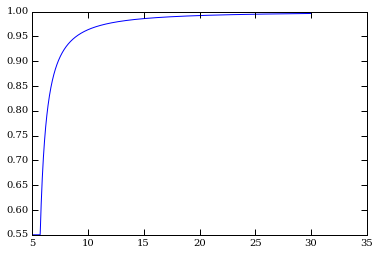

In [301]:
plt.plot(xr,1-func_duff(xr,sim))

In [293]:
sim.h

0.10000000000000001